<a href="https://colab.research.google.com/github/rameshavinash94/CMPE-258_Assignment1/blob/main/PARTA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 663.1 MB 1.7 kB/s 
     |████████████████████████████████| 8.8 MB 55.3 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Successfully uninstalled torchvision-0.11.1+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.2.0+cu92 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.2.0+cu92 which is incompatible.


In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 23.7 MB/s 
     |████████████████████████████████| 1.2 MB 55.4 MB/s 
     |████████████████████████████████| 46 kB 5.3 MB/s 
     |████████████████████████████████| 189 kB 72.5 MB/s 
     |██████████████████████████████▎ | 834.1 MB 1.3 MB/s eta 0:00:38tcmalloc: large alloc 1147494400 bytes == 0x55d9e1c7a000 @  0x7f949c30e615 0x55d9a7d3f3bc 0x55d9a7e2018a 0x55d9a7d421cd 0x55d9a7e34b3d 0x55d9a7db6458 0x55d9a7db102f 0x55d9a7d43aba 0x55d9a7db62c0 0x55d9a7db102f 0x55d9a7d43aba 0x55d9a7db2cd4 0x55d9a7e35986 0x55d9a7db2350 0x55d9a7e35986 0x55d9a7db2350 0x55d9a7e35986 0x55d9a7db2350 0x55d9a7d43f19 0x55d9a7d87a79 0x55d9a7d42b32 0x55d9a7db61dd 0x55d9a7db102f 0x55d9a7d43aba 0x55d9a7db2cd4 0x55d9a7db102f 0x55d9a7d43aba 0x55d9a7db1eae 0x55d9a7d439da 0x55d9a7db2108 0x55d9a7db102f
     |████████████████████████████████| 881.9 MB 1.9 kB/s 
     |████████████████████████████████| 23.2 MB 1.2 MB/s 
     |████████████████████████████████| 56 kB 5.6 MB/s 
   

In [3]:
from fastbook import *
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

**cnn_learner for image classification**

In [4]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.166491,0.015536,0.005413,00:53


epoch,train_loss,valid_loss,error_rate,time
0,0.046257,0.012203,0.002706,00:59


**Unet_learner for segmentation**

In [5]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


epoch,train_loss,valid_loss,time
0,2.885944,21.666121,00:01


epoch,train_loss,valid_loss,time
0,3.739638,2.191275,00:02
1,2.735170,1.846827,00:02
2,2.247630,1.252438,00:02
3,1.920277,1.138473,00:02
4,1.664712,1.009650,00:02
5,1.463596,0.917165,00:02
6,1.307340,0.863087,00:02
7,1.186825,0.856265,00:02


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


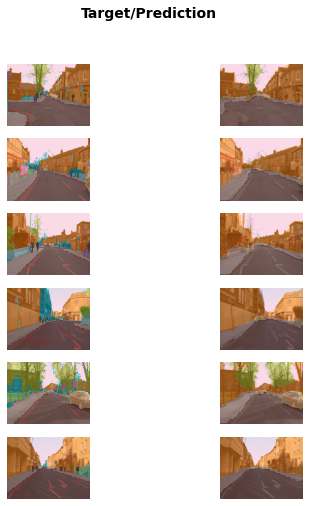

In [6]:
learn.show_results(max_n=6, figsize=(7,8))

**text_classifier_learner for sentiment analysis**

In [7]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.466866,0.398173,0.822360,03:26


epoch,train_loss,valid_loss,accuracy,time
0,0.314806,0.236450,0.904960,06:53
1,0.246294,0.211458,0.919720,06:54
2,0.197891,0.185962,0.928960,06:53


epoch,train_loss,valid_loss,accuracy,time
0,0.314806,0.236450,0.904960,06:53
1,0.246294,0.211458,0.919720,06:54
2,0.197891,0.185962,0.928960,06:53
3,0.137145,0.187286,0.931840,06:54


**Tabular_learner for decisiontree**

In [11]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [12]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.378200,0.361597,0.833538,00:06
1,0.368457,0.353785,0.837224,00:04
2,0.358901,0.347259,0.837224,00:04


**Collab_learner for ranking**

In [9]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.510315,1.397942,00:00


epoch,train_loss,valid_loss,time
0,1.391661,1.340655,00:00
1,1.276416,1.163058,00:00
2,1.043078,0.847952,00:00
3,0.815881,0.694153,00:00
4,0.706843,0.656811,00:00
5,0.663266,0.643065,00:00
6,0.641277,0.639704,00:00
7,0.629025,0.637284,00:00
8,0.621266,0.635936,00:00
9,0.610945,0.635873,00:00


In [10]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,98.0,81.0,5.0,4.822696
1,47.0,22.0,4.0,3.823296
2,86.0,13.0,3.0,3.333477
3,20.0,75.0,4.5,3.700958
4,79.0,73.0,5.0,4.382028
5,79.0,51.0,4.5,4.432371
6,73.0,97.0,4.0,3.879349
7,47.0,86.0,4.0,4.206077
8,33.0,53.0,4.0,4.196565
